In [1]:
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [2]:
with open('data/annotations/train.json', 'r') as f:
    data = json.load(f)

In [3]:
df = pd.DataFrame(data['annotations'])
print(df.shape)
df.head()

(87106, 3)


,image_id,bbox,category_id
0,318219,"[505.24, 0.0, 47.86, 309.25]",72
1,318219,"[470.68, 0.0, 45.93, 191.86]",72
2,318219,"[442.51, 0.0, 43.39, 119.87]",72
3,554625,"[380.74, 112.85, 40.62, 248.82]",72
4,554625,"[339.13, 32.99, 32.99, 175.5]",72


In [4]:
class JSONLoader:
    def __init__(self, data_folder):
        data_folder = Path(data_folder)
        self.ann_folder = data_folder/'annotations'
        self.img_folder = data_folder/'images'

    def load_train(self):
        with open(self.ann_folder/'train.json', 'r') as f:
            data = json.load(f)
            
        df = pd.DataFrame(data['annotations'])
        id2img = {d['id']:self.img_folder/d['file_name'] for d in data['images']}
        cat_id2id = {d['id']:i+1 for i, d in enumerate(data['categories'])}
        id2label = {i+1:d['name'] for i, d in enumerate(data['categories'])}
        id2label[0] = 'background'

        df.image_id = df.image_id.replace(id2img)
        df.category_id = df.category_id.replace(cat_id2id)
        return df, id2label

    def load_test(self):
        with open(self.ann_folder/'test.json', 'r') as f:
            data = json.load(f)
        df = pd.DataFrame(data['annotations'])
        id2img = {d['id']:self.img_folder/d['file_name'] for d in data['images']}
        df.image_id = df.image_id.replace(id2img)
        return df

In [5]:
loader = JSONLoader('data')
df, id2label = loader.load_train()

In [7]:
agg_df = df.groupby('image_id').agg(list).reset_index()
img_path, bboxes, ids = agg_df.loc[35]
img = Image.open(img_path)

In [8]:
def show_bbs(img, bboxes, ids=None):
    draw = ImageDraw.Draw(img)
    if ids:
        labels = [id2label[id] for id in ids]
    for i, bbox in enumerate(bboxes):
        x_min, y_min, w, h = bbox
        draw.rectangle(((x_min, y_min), (x_min+w, y_min+h)), outline="green", width=3)
        if ids: 
            draw.text((x_min, y_min-10), labels[i], fill="white")
    plt.imshow(img)
    plt.axis('off')
    plt.show()

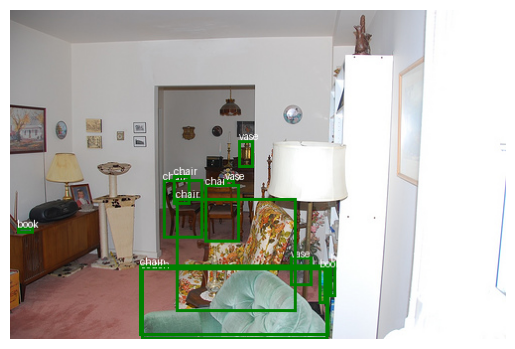

In [9]:
show_bbs(img, bboxes, ids)